In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# Описание работы
## Маркетинговая компания
Датасет содержит информацию связаную с кампаниями прямого маркетинга(телефонными звонками) португальского банковского учреждения.
Задачей классификации для данного датасета является орпеделение будет ли клиентом открыт срочный депозит.

## 1. Загрузка и чтение данных

In [3]:
dataset = "bank_customer_survey.csv"
data_raw = pd.read_csv(dataset)
data_raw.shape

(45211, 17)

## 2. Подготовка данных

Избавимся от категориальных признаков с помощью метода бинаризации.

In [5]:
data_raw["job"] = data_raw["job"].astype("category")
data_raw["marital"] = data_raw["marital"].astype("category")
data_raw["education"] = data_raw["education"].astype("category")
data_raw["contact"] = data_raw["contact"].astype("category")
data_raw["month"] = data_raw["month"].astype("category")
data_raw["poutcome"] = data_raw["poutcome"].astype("category")

data_raw = pd.get_dummies(data_raw, drop_first=True)
print(data_raw.shape)
data_raw.head()

(45211, 43)


,age,balance,day,duration,campaign,pdays,previous,y,job_blue,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


Пропущенных значений нет.

In [9]:
data_raw.isna().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_blue               0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self               0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0


Проведем нормализацию количественных признаков.

In [10]:
data_normal = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_normal.describe()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.297873,0.085171,0.493547,0.052494,0.028449,0.047245,0.002110,0.116985,0.215257,0.032890,...,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478
std,0.137906,0.027643,0.277416,0.052364,0.049968,0.114827,0.008376,0.321406,0.411005,0.178351,...,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.073457,0.233333,0.020943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.272727,0.076871,0.500000,0.036600,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.389610,0.085768,0.666667,0.064864,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Выбор тестовой и обучающей выборки

In [11]:
X = data_normal.drop(["y"], 1)
y = data_normal["y"]

print(X.shape)
print(y.shape)

(45211, 42)
(45211,)


Разобьем данные на обучающую и тестовую выборки:

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(30291, 14920)

## 4. Подбор гиперпараметров

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

### 4.1 Подбор количества нейронов в однослойной сети

In [14]:
n = 4
hidden_layer_size = np.linspace(10, 200, n).astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in hidden_layer_size:
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                        solver='adam', activation='relu', max_iter=1000, random_state=13)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Train: Min error=0.035588128487009346, number of neurons=200
Test: Min error=0.0967828418230563, number of neurons=10


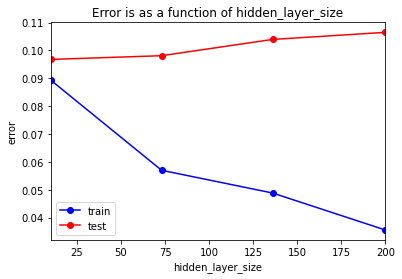

In [15]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

print("Train: Min error={0}, number of neurons={1}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err)]))
print("Test: Min error={0}, number of neurons={1}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err)]))

Train: max accuracy=0.9644118715129907, number of neurons=200
Test: max accuracy=0.9032171581769437, number of neurons=10


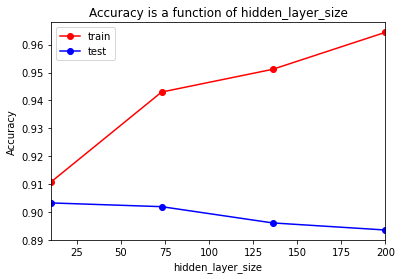

In [16]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

print("Train: max accuracy={0}, number of neurons={1}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc)]))
print("Test: max accuracy={0}, number of neurons={1}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc)]))

### 4.2 Подбор количества нейронов в двуслойной сети

In [17]:
n = 4
hidden_layer_size = np.linspace(10, 200, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in enumerate(hidden_layer_size):
    for j, size_2 in enumerate(hidden_layer_size):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                            solver='adam', activation='relu', max_iter=1000, random_state=13)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

Train: Min error=0.007064804727476808, number of neurons=136,200
Test: Min error=0.09477211796246648, number of neurons=10,136


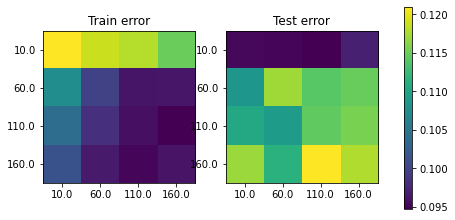

In [18]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(10, 200, 200 / n))
plt.yticks(np.arange(n), np.arange(10, 200, 200 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(10, 200, 200 / n))
plt.yticks(np.arange(n), np.arange(10, 200, 200 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

print("Train: Min error={0}, number of neurons={1},{2}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err) // n],
        hidden_layer_size[np.argmin(train_err) % n]))
print("Test: Min error={0}, number of neurons={1},{2}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err) // n],
        hidden_layer_size[np.argmin(test_err) % n]))

Train: Max accuracy=0.9929351952725232, number of neurons=136,200
Test: Max accuracy=0.9052278820375335, number of neurons=10,136


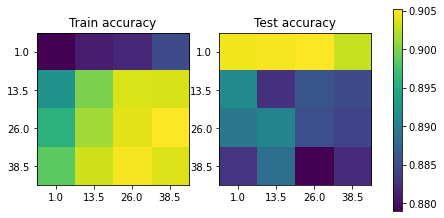

In [19]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

print("Train: Max accuracy={0}, number of neurons={1},{2}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc) // n],
        hidden_layer_size[np.argmax(train_acc) % n]))
print("Test: Max accuracy={0}, number of neurons={1},{2}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc) // n],
        hidden_layer_size[np.argmax(test_acc) % n]))

### 4.3 Подбор параметра регуляризации

In [20]:
alphas = np.logspace(-3, 2, 5)
test_err, train_err = [], []
train_acc, test_acc = [], []


for alpha in alphas:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (10,10,), 
                            solver='adam', activation='relu', max_iter=1000, random_state=13)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

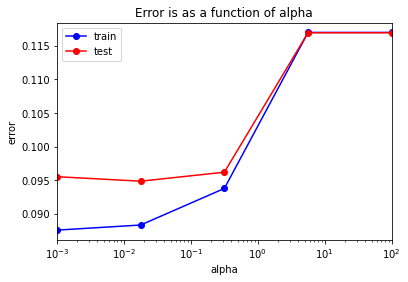

In [23]:
plt.semilogx(alphas, train_err, 'b-o', label = 'train')
plt.semilogx(alphas, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Error is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

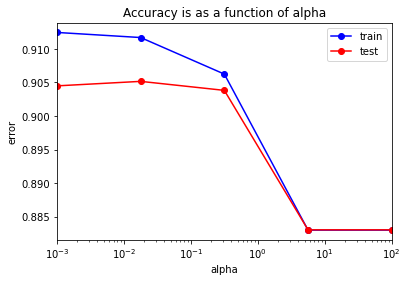

In [22]:
plt.semilogx(alphas, train_acc, 'b-o', label = 'train')
plt.semilogx(alphas, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Accuracy is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

## 5. Выводы

### 5.1 Подбор числа нейронов в однослойной моделе

* За оптимальный размер скрытого слоя возьмем 10 нейронов. (accuracy=0.91)
* При увеличение количества нейронов можем наблюдать переобучение модели.

### 5.2 Подбор числа нейронов в двуслойной моделе

* За оптимальный размер скрытых слоев возьмем 10 и 10 нейронов. (accuracy=0.91)
* Можем заметить, что при добавление второго скрытого слоя точность не изменяется, следовательно для решения задачи будет достаточно однослойной сети
* Так же как и в подборе однослойной модели в двуслойной модели с ростом количества нейронов наблюдается переобучение.

### 5.3 Подбор параметра регуляризации

* При выборе параметра регуляризации переобучения не наблюдается.
* При lambda > 10e-3 начинается рост ошибки и снижение accuracy. То есть с ростом lamda уменьшаются веса модели и стремятся к нулю.